In [46]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# pipeline construction
from sklearn.pipeline import FeatureUnion, Pipeline 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# data processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# models trainng
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# models validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# remove annoying warnings
import warnings
warnings.filterwarnings('ignore')

## Download data

In [47]:
df_raw = sns.load_dataset('titanic')
df_raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [48]:
# shufle data is a good practice
df_raw = df_raw.sample(frac=1).reset_index(drop=True)
df_raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,31.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
1,0,2,male,39.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
2,1,2,female,27.0,1,0,13.8583,C,Second,woman,False,NaN,Cherbourg,yes,False
3,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
4,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True


In [49]:
df_raw.shape

(891, 15)

In [50]:
# split data into training and test set 
X_train, X_test, y_train, y_test = train_test_split(df_raw.drop('survived', axis=1), 
                                                    df_raw['survived'], 
                                                    test_size=0.2,
                                                    stratify=df_raw['survived'],
                                                    random_state=42)

## Basic Exploratory Data Analysis

In [51]:
# columns type
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [52]:
# basic statistics
df_raw.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Unique values per column

In [53]:
for column in df_raw:
    
    print(f'{column} - {len(df_raw[column].unique())}')
    print(df_raw[column].unique())
    print()

survived - 2
[0 1]

pclass - 3
[3 2 1]

sex - 2
['male' 'female']

age - 89
[31.   39.   27.   22.   28.   45.5    nan 64.   10.   56.   19.   55.
 47.   20.    8.   17.   24.   40.5   1.   29.   33.   59.   18.   13.
  4.   36.   32.   45.   58.   40.   54.   25.   21.   30.   50.   52.
 51.   35.   23.   62.   34.   26.   65.   16.   41.   44.   15.    0.83
 60.    2.    9.   43.   14.   46.   37.   38.    7.   49.   23.5  48.
  6.   61.    3.   42.   70.   66.   71.    5.   57.   20.5  34.5   0.75
 28.5  11.   74.   53.    0.67  0.42 30.5  32.5  63.   70.5   0.92 14.5
 36.5  24.5  55.5  12.   80.  ]

sibsp - 7
[0 1 3 4 2 8 5]

parch - 7
[0 4 2 1 3 5 6]

fare - 248
[  7.75    13.      13.8583   7.2292  35.5      7.225    7.8958 263.
  27.9      7.925   83.1583  26.     110.8833  16.      52.5542  30.5
   9.225  146.5208   8.05    21.075   10.5      8.1583  69.3     14.5
  15.7417  27.7208  27.75     9.5     56.4958  13.5     14.4542  29.125
 120.      51.8625   6.975   29.7      7.87

### Missing values

In [54]:
a = df_raw.isna().mean()*100
a[a>0]

age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64

In [55]:
a = df_raw.isna().sum()
a[a>0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

### Distributions

In [56]:
numeric_columns = df_raw.select_dtypes(include=np.number).columns
numeric_columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [57]:
non_numeric_columns = df_raw.select_dtypes(exclude=np.number).columns
non_numeric_columns

Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### Numeric columns

Column: survived
Unique values: 2


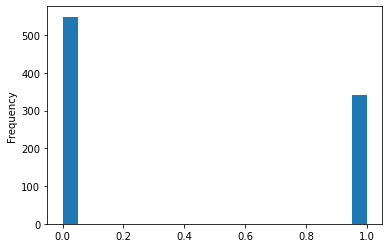

Column: pclass
Unique values: 3


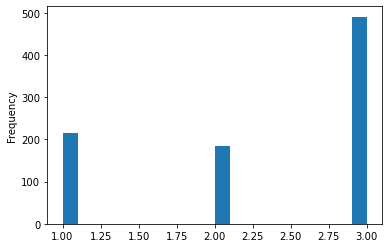

Column: age
Unique values: 89


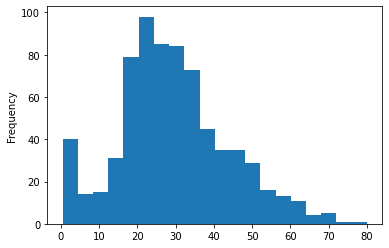

Column: sibsp
Unique values: 7


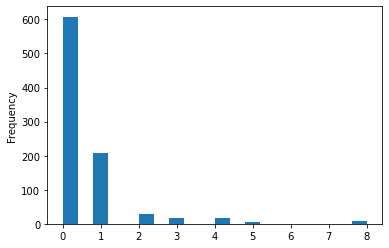

Column: parch
Unique values: 7


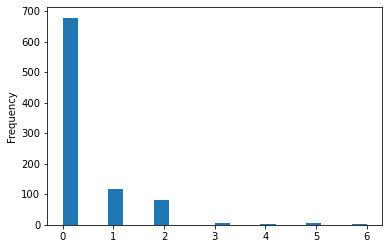

Column: fare
Unique values: 248


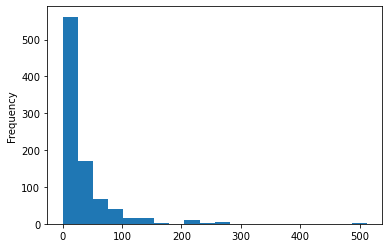

In [58]:
for column in numeric_columns:
    
    print(f'Column: {column}')
    print(f'Unique values: {len(df_raw[column].unique())}')
    df_raw[column].plot.hist(bins=20)
    plt.show()

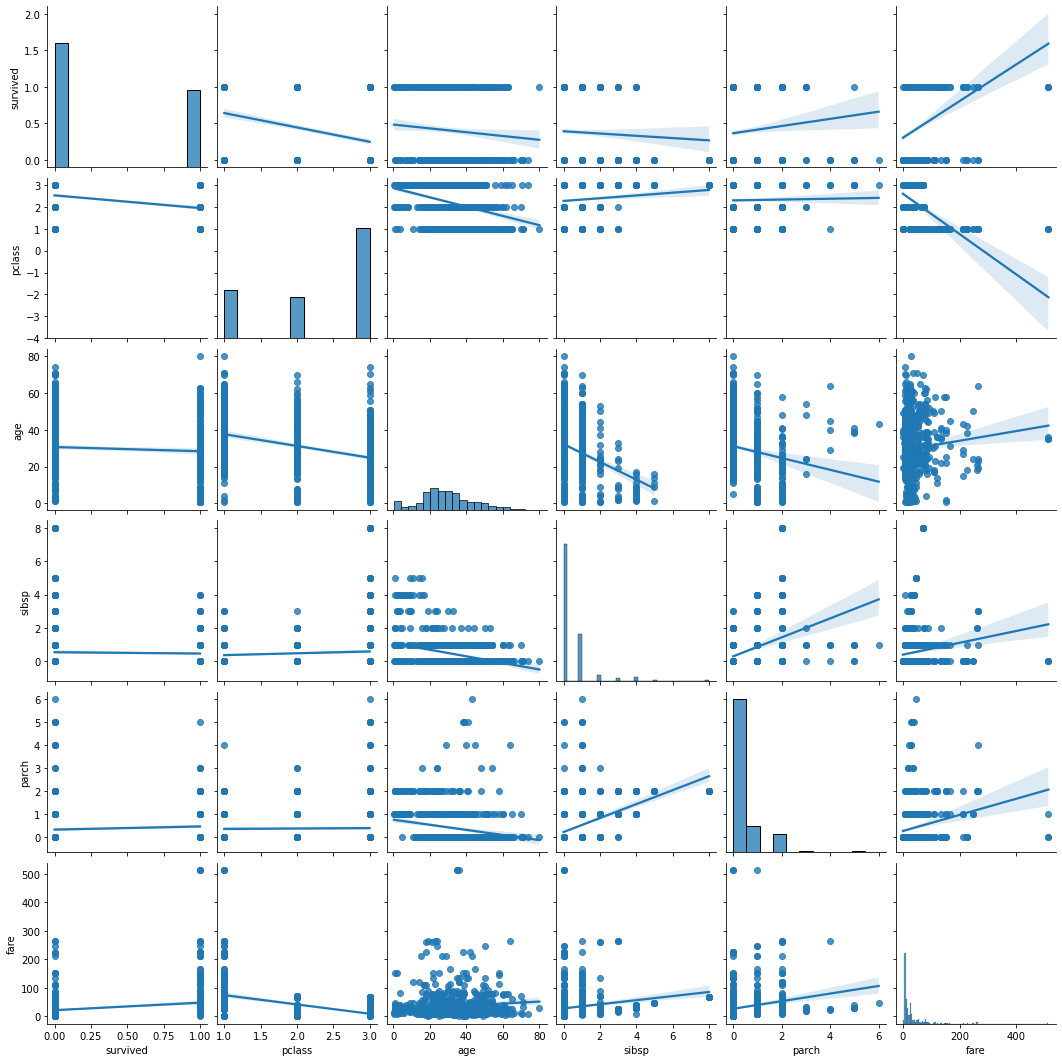

In [59]:
# mutual dependencies
df_numeric = df_raw[numeric_columns]
sns.pairplot(df_numeric, kind='reg')
plt.show()

### Categorical columns

Columns: sex
Unique values: 2


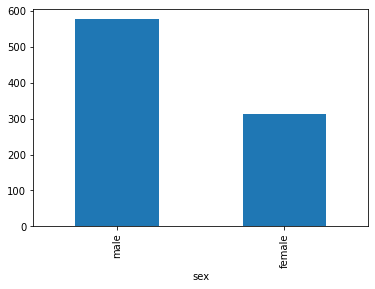

Columns: embarked
Unique values: 4


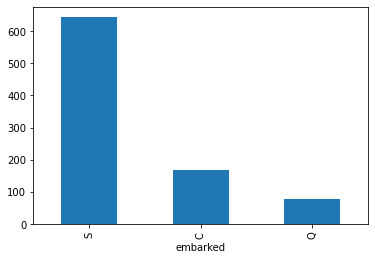

Columns: class
Unique values: 3


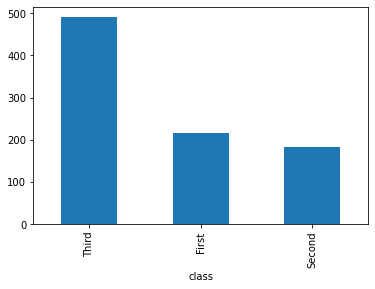

Columns: who
Unique values: 3


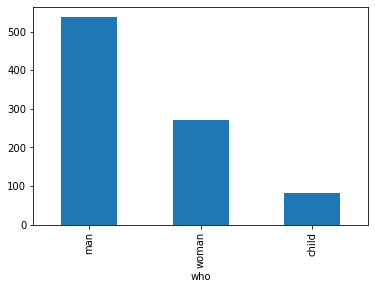

Columns: adult_male
Unique values: 2


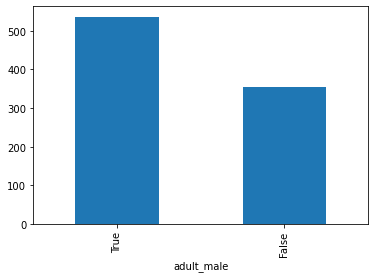

Columns: deck
Unique values: 8


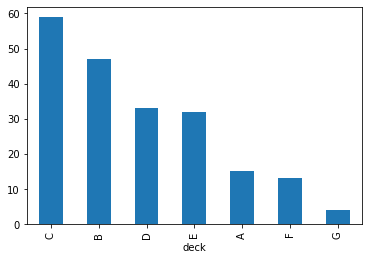

Columns: embark_town
Unique values: 4


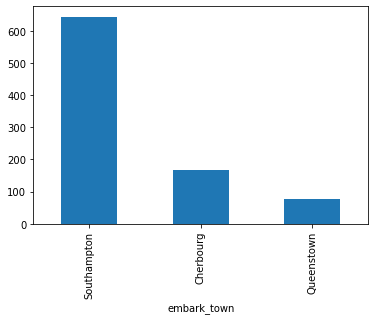

Columns: alive
Unique values: 2


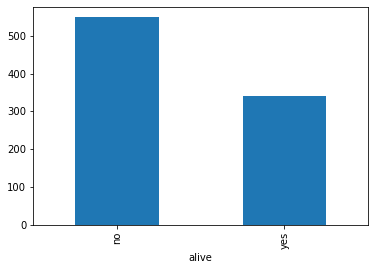

Columns: alone
Unique values: 2


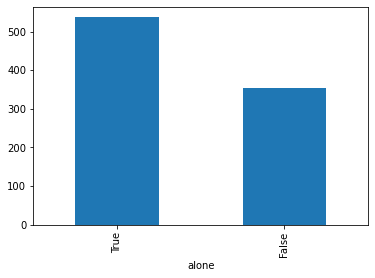

In [60]:
for column in non_numeric_columns:
    
    print(f'Columns: {column}')
    print(f'Unique values: {len(df_raw[column].unique())}')
    df_raw[column].value_counts().plot.bar()
    plt.show()

In [61]:
df_raw.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,31.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
1,0,2,male,39.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


### Conclusions:
* there are duplicated columns - survived and alive, pclass and class, embark and embark_town: to be removed
* there are columns with too many missing values: 'deck'. 'Age' can be kept and imputed
* numeric columns are skewed. For linear algorithms it can be a problem. Log (or Box-Cox, or Yeo-Jonson) transformation may help
* binary column 'alone' should be turned to 0-1.
* categorical columns should be encoded using one-hot encoding.
<br>

__Consider:__
* 'who' can be turned to 'adult' and 'child' => 'adult_male' can be then removed as a redundant one
* not to remove 'deck' and impute with new category 'Missing'
* create new features (multiplication of class and sex; multiplication of sex and age)


# Simplest Pipeline

In [62]:
# data
X_1 = pd.DataFrame(df_raw['pclass'])
y_1 = df_raw['survived']

# steps of the pipeline
steps = [
    ('scaler', MinMaxScaler()),
    # if the pipeline has the model, it MUST be the last step
    ('model', LogisticRegression()) 
    
    # however, the pipeline can be only for features transforming, not for prediction
]

# pipeline definition
pipeline_1 = Pipeline(steps=steps)

# pipeline training / fitting
pipeline_1.fit(X_1, y_1)

# prediction using the pipeline
preds = pipeline_1.predict(X_1)
preds[:5]

array([0, 0, 0, 0, 1])

In [63]:
# pipeline evaluation
pipeline_1.score(X_1, y_1)

0.6790123456790124

In [64]:
pipeline_1.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('model', LogisticRegression())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'model': LogisticRegression(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [65]:
pipeline_1.named_steps

{'scaler': MinMaxScaler(), 'model': LogisticRegression()}

In [66]:
pipeline_1.named_steps['scaler']

MinMaxScaler()

In [67]:
pipeline_1.steps

[('scaler', MinMaxScaler()), ('model', LogisticRegression())]

## Task 1 - data transformation
* As a features, take class and fare. 
* Add Standard Scaler
* Add PCA step to the pipeline with the only one component
* Show transformed features

In [68]:
# data
X_1 = pd.DataFrame(df_raw[['pclass', 'fare']])
y_1 = df_raw['survived']

# steps of the pipeline
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
]

# pipeline definition
pipeline_1 = Pipeline(steps=steps)

# pipeline training / fitting
pipeline_1.fit(X_1, y_1)

# transformation using the pipeline
X_pca = pipeline_1.transform(X_1)
X_pca[:5].flatten()

array([-9.33207761e-01, -1.22371045e-02, -1.71664946e-05, -9.40622585e-01,
        1.15432825e+00])

## Task 2 - prediction
* As a features, take class and fare. 
* Add Standard Scaler
* Add PCA step to the pipeline with the only one component
* Add the estimator at the end of the pipeline
* Evaluate the model

In [69]:
# data
X_1 = pd.DataFrame(df_raw[['pclass', 'fare']])
y_1 = df_raw['survived']

# steps of the pipeline
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1)),
    ('model', LogisticRegression())
]

# pipeline definition
pipeline_1 = Pipeline(steps=steps)

# pipeline training / fitting
pipeline_1.fit(X_1, y_1)

# prediction using the pipeline
preds = pipeline_1.predict(X_1)
preds[:5]

array([0, 0, 0, 0, 1])

In [70]:
# pipeline evaluation
pipeline_1.score(X_1, y_1)

0.6801346801346801

# Custom Transformers
* allows to implement any logic on features
* can be included as a step into the pipeline

## Transformer for removing columns from the dataset
* no fit method implementation

In [71]:
# transformer must be defined as a class implementing two methods: fit and transform
class RemoveColumnsTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns_to_remove: list):
        self.columns_to_remove = columns_to_remove
    
    # even if nothing to fit, this method must return self
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        return X.drop(self.columns_to_remove, axis=1)

In [98]:
# define test dataset
X_2 = df_raw[['pclass', 'fare']]

# initialize the transformer
rc = RemoveColumnsTransformer(columns_to_remove=['fare'])

# fit and transform transformer
rc.fit(X_2)

transformed_df = rc.transform(X_2)
transformed_df.head()

,pclass
0,3
1,2
2,2
3,3
4,1


In [99]:
rc.fit_transform(X_2).head()

,pclass
0,3
1,2
2,2
3,3
4,1


## Task 3

* create custom transformer SelectColumnsTransformer which can select specified columns from the dataset
* return pclass and fare

In [113]:
class SelectColumnsTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns_to_select: list):
        self.columns_to_select = columns_to_select
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        return X[self.columns_to_select]

In [114]:
# define test dataset
X_3 = df_raw

# initialize the transformer
sc = SelectColumnsTransformer(columns_to_select=['pclass', 'fare'])

# fit and transform transformer
sc.fit(X_3)

transformed_df = sc.transform(X_3)
transformed_df.head()

,pclass,fare
0,3,7.7500
1,2,13.0000
2,2,13.8583
3,3,7.2292
4,1,35.5000


## Task 3.1 
* create transformer __SelectColumnsByTypeTransformer__ which can select columns by type - 'numeric' or 'object'

In [128]:
class SelectColumnsByTypeTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns_type='number'):
        self.columns_type = columns_type
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        return X.select_dtypes(include=self.columns_type)

In [129]:
# define test dataset
X_3 = df_raw

# initialize the transformer
sc = SelectColumnsByTypeTransformer()

# fit and transform transformer
transformed_df = sc.fit_transform(X_3)
transformed_df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,31.0,0,0,7.7500
1,0,2,39.0,0,0,13.0000
2,1,2,27.0,1,0,13.8583
3,0,3,22.0,0,0,7.2292
4,1,1,28.0,0,0,35.5000


In [130]:
# define test dataset
X_3 = df_raw

# initialize the transformer
sc = SelectColumnsByTypeTransformer(columns_type='object')

# fit and transform transformer
transformed_df = sc.fit_transform(X_3)
transformed_df.head()

,sex,embarked,who,embark_town,alive
0,male,Q,man,Queenstown,no
1,male,S,man,Southampton,no
2,female,C,woman,Cherbourg,yes
3,male,C,man,Cherbourg,no
4,male,S,man,Southampton,yes


## Transformer for missing data imputation
* fit method implementation

In [131]:
class ImputeNumColsTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, method='mean'):
        
        self.method=method
        # for keeping values to impute any specified column
        self.impute_values = {}
        
    def fit(self, X, y=None):
        
        if self.method == 'mean':
            
            for col in X:
                mean = X[col].mean()
                self.impute_values[col] = mean   
        
        return self 
    
    def transform(self, X, y=None):
        
        for col in X:
            value_to_impute = self.impute_values[col]
            X[col] = X[col].fillna(value_to_impute)
       
        return X

In [132]:
# testing data with missing values
X_2 = df_raw[['pclass', 'age']]
X_2.isna().mean()

pclass    0.000000
age       0.198653
dtype: float64

In [135]:
# fitting imputer
imputer = ImputeNumColsTransformer(method='mean')
imputer.fit(X_2)

ImputeNumColsTransformer()

In [136]:
imputer.impute_values

{'pclass': 2.308641975308642, 'age': 29.69911764705882}

In [137]:
# transforming columns => as a result we expect no missing values in the columns
X_2_filled = imputer.transform(X_2)
X_2_filled.isna().sum()

pclass    0
age       0
dtype: int64

## Task 4
* extent the ImputeNumColsTransformer so that numeric column can be imputed by __median__ value

In [193]:
class ImputeNumColsTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, method='mean'):
        
        self.method=method
        # for keeping values to impute any specified column
        self.impute_values = {}
        
    def fit(self, X, y=None):
        
        if self.method == 'mean':
            
            for col in X:
                mean = X[col].mean()
                self.impute_values[col] = mean
        
        # extra option is added here
        elif self.method == 'median':
            
            for col in X:
                median = X[col].median()
                self.impute_values[col] = median
        
        # opcjonalnie: obsługa błędów
        else:
            raise Exception("Available methods: mean, median")
        
        return self 
    
    def transform(self, X, y=None):
        
        for col in X:
            value_to_impute = self.impute_values[col]
            X[col] = X[col].fillna(value_to_impute)
       
        return X

In [189]:
# testing data with missing values
X_2 = df_raw[['pclass', 'age']]
X_2.isna().mean()

pclass    0.000000
age       0.198653
dtype: float64

In [190]:
# fitting imputer
imputer = ImputeNumColsTransformer(method='median')
imputer.fit(X_2)

ImputeNumColsTransformer(method='median')

In [191]:
imputer.impute_values

{'pclass': 3.0, 'age': 28.0}

In [192]:
# transforming columns => as a result we expect no missing values in the columns
X_2_filled = imputer.transform(X_2)
X_2_filled.isna().sum()

pclass    0
age       0
dtype: int64

## Task 5 
* implement ImputeCatColsTransformer for imputing missing values for categorical columns
* there are two options for imputing: by mode or my new category 'missing'

In [236]:
class ImputeCatColsTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, method='mode'):
        
        self.method=method
        # for keeping values to impute any specified column
        self.impute_values = {}
        
    def fit(self, X, y=None):
        
        if self.method == 'mode':
            
            for col in X:
                mode = X[col].mode()[0]  # mode() zwraca słownik, więc trzeba odwołać się poprzez klucz
                self.impute_values[col] = mode
                
        elif self.method == 'missing': 
            
            for col in X:
                self.impute_values[col] = 'missing'
                
        # opcjonalnie: obsługa błędów
        else:
            raise Exception("Available methods: mode, missing")
        
        return self 
    
    def transform(self, X, y=None):
        
        for col in X:
            value_to_impute = self.impute_values[col]
            X[col] = X[col].astype('object')  # kolumna typu 'category' nie pozwala na dodawanie nowych wartości
            X[col] = X[col].fillna(value_to_impute)
       
        return X

### Fill with mode

In [237]:
X_2 = df_raw[['deck', 'embarked']]
X_2.isna().mean()

deck        0.772166
embarked    0.002245
dtype: float64

In [238]:
cat_imputer = ImputeCatColsTransformer()
cat_imputer.fit(X_2)

ImputeCatColsTransformer()

In [239]:
cat_imputer.impute_values

{'deck': 'C', 'embarked': 'S'}

In [240]:
X_2_filled = cat_imputer.transform(X_2)
X_2_filled.isna().sum()

deck        0
embarked    0
dtype: int64

### Fill with new category 'missing'

In [241]:
X_2 = df_raw[['deck', 'embarked']]
X_2.isna().mean()

deck        0.772166
embarked    0.002245
dtype: float64

In [242]:
cat_imputer = ImputeCatColsTransformer(method='missing')
cat_imputer.fit(X_2)

ImputeCatColsTransformer(method='missing')

In [243]:
cat_imputer.impute_values

{'deck': 'missing', 'embarked': 'missing'}

In [244]:
X_2_filled = cat_imputer.transform(X_2)
X_2_filled.isna().sum()

deck        0
embarked    0
dtype: int64

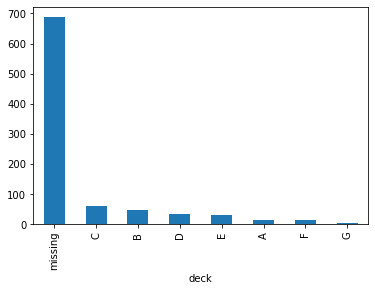

In [245]:
# for 'deck' column missing value must be dominant
X_2_filled['deck'].value_counts().plot.bar();

# Not So Simple Pipeline
* take only numeric columns
* fill missing values by median
* scale with standard scaler
* reduce dimensionality
* train model

In [259]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
707,2,female,32.5,0,0,13.0000,S,Second,woman,False,E,Southampton,yes,True
472,3,male,16.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
516,2,male,32.0,2,0,73.5000,S,Second,man,True,NaN,Southampton,no,False
850,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
802,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False


In [277]:
steps = [
    ('selector', SelectColumnsByTypeTransformer(columns_type='number')), 
    ('imputer', ImputeNumColsTransformer(method='median')), 
    ('scaler', StandardScaler()),
    ('pca', PCA()), 
    ('model', LogisticRegression())
]

pipeline_2 = Pipeline(steps=steps)
pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('selector', SelectColumnsByTypeTransformer()),
                ('imputer', ImputeNumColsTransformer(method='median')),
                ('scaler', StandardScaler()), ('pca', PCA()),
                ('model', LogisticRegression())])

In [278]:
# pipeline_2.predict(X_test)
pipeline_2.score(X_test, y_test)

0.664804469273743

## Task 6
* create a pipeline:
    * select two columns - age and class
    * impute missing data with mean
    * scale data with MinMaxScaler
    * reduce dimensionality to 2 dimensions
    * train the model
* evaluate the model

In [259]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
707,2,female,32.5,0,0,13.0000,S,Second,woman,False,E,Southampton,yes,True
472,3,male,16.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
516,2,male,32.0,2,0,73.5000,S,Second,man,True,NaN,Southampton,no,False
850,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
802,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False


In [279]:
steps = [
    ('selector', SelectColumnsTransformer(columns_to_select=['age', 'pclass', 'fare'])), 
    ('imputer', ImputeNumColsTransformer(method='mean')), 
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=2)), 
    ('model', LogisticRegression())
]

pipeline_2 = Pipeline(steps=steps)
pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('selector',
                 SelectColumnsTransformer(columns_to_select=['age', 'pclass',
                                                             'fare'])),
                ('imputer', ImputeNumColsTransformer()),
                ('scaler', MinMaxScaler()), ('pca', PCA(n_components=2)),
                ('model', LogisticRegression())])

In [281]:
pipeline_2.score(X_train, y_train)

0.7120786516853933

In [282]:
# pipeline_2.predict(X_test)
pipeline_2.score(X_test, y_test)  # brak 'overfittingu'

0.6703910614525139

# Feature Union

**Pipelines apply the same transformations to all the columns in the dataset. What if we need to differently handle numeric and categorical columns?**

## Pipeline structure using Feature Union and custom transformers

1. Remove unnecessary or redundant columns
2. Divide all columns into groups with similar handling procedures: __categorical columns__, __numerical columns__

<br>For numerical columns:
    * Impute missing values
    * Scale data
    
<br>For categorical columns:
    * Impute missing values
    * Encode values

3. Train models

## Utility

In [283]:
# result of FeatureUnion is numpy array => turn back to pandas dataframe to enhance readability
def make_df(array, columns):
    return pd.DataFrame(array, columns=columns)

## How to combine pipelines together?

In [284]:
numeric_columns = ['pclass', 'age']
cat_columns = ['sex', 'embarked']

### Numerical pipeline

In [285]:
df_raw.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,31.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
1,0,2,male,39.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


In [304]:
num_steps = [('select_num_columns', SelectColumnsTransformer(numeric_columns))]
num_pipeline = Pipeline(steps=num_steps)
num_pipeline.transform(df_raw).head()

,pclass,age
0,3,31.0
1,2,39.0
2,2,27.0
3,3,22.0
4,1,28.0


### Categorical pipeline

In [305]:
cat_steps = [('select_cat_columns', SelectColumnsTransformer(cat_columns))]
cat_pipeline = Pipeline(steps=cat_steps)
cat_pipeline.fit_transform(df_raw).head()

,sex,embarked
0,male,Q
1,male,S
2,female,C
3,male,C
4,male,S


### Combine two pipelines into single bigger one

In [288]:
# list of pipelines: in our case we have two: numeric and categorical. Can be more!
transformer_list = [('categorical_pipeline', cat_pipeline), 
                    ('numerical_pipeline', num_pipeline ) 
                   ]

# list of pipelines is passed to FeatureUnion
combined_pipeline = FeatureUnion(transformer_list=transformer_list)

# the result will be 4 columns => firstly 2 cat columns, then 2 numeric columns
df_combined = combined_pipeline.fit_transform(df_raw)
df_combined

array([['male', 'Q', 3.0, 31.0],
       ['male', 'S', 2.0, 39.0],
       ['female', 'C', 2.0, 27.0],
       ...,
       ['female', 'S', 3.0, 29.0],
       ['female', 'S', 3.0, 39.0],
       ['female', 'S', 1.0, 23.0]], dtype=object)

In [289]:
combined_pipeline.fit(X_train)
combined_pipeline.transform(X_test)[:5]

array([['male', 'S', 1.0, 45.0],
       ['male', 'S', 2.0, 48.0],
       ['female', 'Q', 2.0, 30.0],
       ['female', 'Q', 3.0, nan],
       ['male', 'S', 3.0, 4.0]], dtype=object)

'combined_pipeline' can be used then as a step in the pipeline with estimator: <br>
1st step - combined_pipeline <br>
2nd step - estomator (e.g., Logistic regression)


In [290]:
# to make it more readable
df_combined = make_df(df_combined, columns = cat_columns + numeric_columns)
df_combined.head()

,sex,embarked,pclass,age
0,male,Q,3.0,31.0
1,male,S,2.0,39.0
2,female,C,2.0,27.0
3,male,C,3.0,22.0
4,male,S,1.0,28.0


## Task 7
* the first pipeline for numeric columns: age, pclass
* the second pipeline for categorical columns: sex, embarked
* numeric pipeline does: feature selection, missing values imputation by median, scaling, dimensionality reduction
* categorical pipeline does: feature selection, missing values imputation, one hot encoding
* two subsets are combined together using FeatureUnion
* final dataset is used to train the logistic regression model => new pipeline containing two steps: feature union and logistic regression
* evaluate the model

__NOTE:__ <br>
1) OneHotEncoder(sparse=False, handle_unknown='ignore') <br>
2) Pipeline should be fitted on X_train, y_train and validated on X_test, y_test

In [298]:
df_raw.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,31.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
1,0,2,male,39.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


In [299]:
numeric_columns = ['pclass', 'age']
cat_columns = ['sex', 'embarked']

In [307]:
num_steps = [
    ('selector', SelectColumnsTransformer(numeric_columns)),    
    ('imputer', ImputeNumColsTransformer(method='median')), 
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
]

num_pipeline = Pipeline(steps=num_steps)
num_pipeline.fit_transform(df_raw)

array([[-0.49601074,  0.67407738],
       [ 0.78494207,  0.2625813 ],
       [ 0.13284952, -0.38951125],
       ...,
       [-0.60469283,  0.56539529],
       [-0.06128238,  1.10880574],
       [ 0.76170978, -1.45309987]])

In [308]:
cat_steps = [
    ('selector', SelectColumnsTransformer(cat_columns)),    
    ('imputer', ImputeCatColsTransformer(method='missing')), 
    ('enoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
]

cat_pipeline = Pipeline(steps=cat_steps)
cat_pipeline.fit_transform(df_raw)

array([[0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.]])

In [313]:
transformer_list = [('categorical_pipeline', cat_pipeline), 
                    ('numerical_pipeline', num_pipeline ) 
                   ]

combined_steps = [('feature_union', FeatureUnion(transformer_list=transformer_list)),
                     ('model', LogisticRegression())
                    ]

combined_pipeline = Pipeline(steps=combined_steps)
combined_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('categorical_pipeline',
                                                 Pipeline(steps=[('selector',
                                                                  SelectColumnsTransformer(columns_to_select=['sex',
                                                                                                              'embarked'])),
                                                                 ('imputer',
                                                                  ImputeCatColsTransformer(method='missing')),
                                                                 ('enoder',
                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                sparse=False,
                                                                                sparse_output=False))])),
                                                ('numerical_pipeline',
                                                 Pipeline(steps=[('selector',
                                                                  SelectColumnsTransformer(columns_to_select=['pclass',
                                                                                                              'age'])),
                                                                 ('imputer',
                                                                  ImputeNumColsTransformer(method='median')),
                                                                 ('scaler',
                                                                  StandardScaler()),
                                                                 ('pca',
                                                                  PCA(n_components=2))]))])),
                ('model', LogisticRegression())])

In [316]:
combined_pipeline.score(X_test, y_test)

0.8100558659217877

# Columns Transformer

In [317]:
# numeric pipeline
numeric_columns = ['pclass', 'age', 'sibsp', 'parch', 'fare'] 
numeric_transformer = Pipeline(steps=[
    # SimpleImputer is ready to use class from sklearn
    ('impute_num_columns', SimpleImputer(strategy='mean')), 
    ('scale_data', MinMaxScaler())
])

# categorical pipeline
cat_columns = ['sex', 'embarked', 'who', 'alone']
categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# transformer = numerical + categorical
transformer = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_columns), 
    ('cat', categorical_transformer, cat_columns)
])

# final pipeline with model
pipeline = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', LogisticRegression())])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_num_columns',
                                                                   SimpleImputer()),
                                                                  ('scale_data',
                                                                   MinMaxScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'embarked', 'who',
                                                   'alone'])])),
                ('classifier', LogisticRegression())])

In [318]:
pipeline.score(X_test, y_test)

0.8324022346368715

In [319]:
preds = pipeline.predict(X_test)

metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

for metric, name in zip(metrics, metrics_name):
    print(f'{name}: {round(metric(preds, y_test),3)}')

Accuracy: 0.832
Precision: 0.754
Recall: 0.8
F1: 0.776


In [321]:
df_raw.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,31.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## Task 8
* implement transformer for log transformation (if value = 0 => 0 else log of value)


In [329]:
class LogTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        
#         def log_transform(x):
#             return 0 if x == 0 else np.log(x)
        
        X = pd.DataFrame(X)
        for col in X:
            X[col] = X[col].apply(lambda x: 0 if x == 0 else np.log(x))
#             X[col] = X[col].apply(log_transform)
       
        return X

In [335]:
X_log = df_raw['fare']  # has zero values
X_log.head()

0     7.7500
1    13.0000
2    13.8583
3     7.2292
4    35.5000
Name: fare, dtype: float64

In [336]:
log_transformer = LogTransformer()
log_transformer.fit(X_log)

LogTransformer()

In [337]:
log_transformer.transform(X_log)[:5]

,fare
0,2.047693
1,2.564949
2,2.628884
3,1.978128
4,3.569533


## Task 8.1 (optional)
* implement transformer for removing outliers from numeric columns

In the transformer's method fit, for each column of the dataset X it should learn two values: low and high <br>
Next, in the tansform method: 
* if the value is higher than upper, make it equal to upper
* if the value is lower than lower, make it equal to lower

The values can be stored in the transformer's attribite __self.boundaries__ in the form like this: <br>
{ <br>
'column_name_1': [lower_value_1, upper_value_1], <br>
'column_name_2': [lower_value_2, upper_value_2], <br>
...<br>
}


In [339]:
# outliers for "age" column
age = df_raw['age']  # df_raw['fare']
iqr = np.nanpercentile(age, 75) - np.nanpercentile(age, 25)  # ignoring NaN values
lower, upper = (np.nanpercentile(age, 25) - 1.5 * iqr), (np.nanpercentile(age, 75) + 1.5 * iqr) 

# what is out of range can be treated as outlier
lower, upper

(-6.6875, 64.8125)

In [340]:
class RemoveOutliersTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.boundaries = {}  # self.boundaries = {"age": [-6, 65], "fare": [-26, 65]}
    
    def fit(self, X, y=None):
        
        for col in X:
            iqr = np.nanpercentile(X[col], 75) - np.nanpercentile(X[col], 25)  # ignoring NaN values
            lower, upper = (np.nanpercentile(X[col], 25) - 1.5 * iqr), (np.nanpercentile(X[col], 75) + 1.5 * iqr)
            self.boundaries[col] = [lower, upper]
            
        return self 
    
    def transform(self, X, y=None):

        for col in X:
            X.loc[X[col] < self.boundaries[col][0], col] = self.boundaries[col][0]
            X.loc[X[col] > self.boundaries[col][1], col] = self.boundaries[col][1]
       
        return X

In [341]:
X_outliers = df_raw[['age', 'fare']]
X_outliers.describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [342]:
rot = RemoveOutliersTransformer()
rot.fit(X_outliers)

RemoveOutliersTransformer()

In [343]:
rot.boundaries

{'age': [-6.6875, 64.8125], 'fare': [-26.724, 65.6344]}

In [345]:
X_outliers_transformed = rot.transform(X_outliers)
X_outliers_transformed.describe()

,age,fare
count,714.000000,891.000000
mean,29.622700,24.046813
std,14.316665,20.481625
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,64.812500,65.634400


## Task 9
Using ColumnsTransformer, implement the pipeline:
* first sub_pipeline takes columns: fare, sibsp, parch
* transformations: missing values by median, removing outliers, log transformation, scaling
<br> <br>
* second sub_pipeline takes columns: age, pclass
* transformations: missing values by mean, scaling
<br><br>
* third sub_pipeline takes columns: sex, embarked, alone
* transformations: missing values by mode, OHE
<br><br>
* final pipeline to train using Logistic Regression

In [351]:
df_raw.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,31.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [355]:
# first sub_pipeline
first_cols = ['fare', 'sibsp', 'parch'] 
first_transformer = Pipeline(steps=[
    ('imputer', ImputeNumColsTransformer(method='median')), 
    ('outlier', RemoveOutliersTransformer()),
    ('loger', LogTransformer()),
    ('scaler', MinMaxScaler())
])

# second sub_pipeline
second_cols = ['age', 'pclass'] 
second_transformer = Pipeline(steps=[
    ('imputer', ImputeNumColsTransformer(method='mean')), 
    ('scaler', MinMaxScaler())
])

# third sub_pipeline
third_cols = ['sex', 'embarked', 'alone'] 
third_transformer = Pipeline(steps=[
    ('imputer', ImputeCatColsTransformer(method='mode')), 
    ('enoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [356]:
# transformer = numerical + categorical
transformer = ColumnTransformer(transformers=[
    ('first', first_transformer, first_cols), 
    ('second', second_transformer, second_cols),
    ('third', third_transformer, third_cols)
])

# final pipeline with model
pipeline = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', LogisticRegression())])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('first',
                                                  Pipeline(steps=[('imputer',
                                                                   ImputeNumColsTransformer(method='median')),
                                                                  ('outlier',
                                                                   RemoveOutliersTransformer()),
                                                                  ('loger',
                                                                   LogTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['fare', 'sibsp', 'parch']),
                                                 ('second',
                                                  Pipeline(steps=[('imputer',
                                                                   ImputeNumColsTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'pclass']),
                                                 ('third',
                                                  Pipeline(steps=[('imputer',
                                                                   ImputeCatColsTransformer()),
                                                                  ('enoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'embarked',
                                                   'alone'])])),
                ('classifier', LogisticRegression())])

In [357]:
pipeline.score(X_test, y_test)

0.8212290502793296

In [350]:
preds = pipeline.predict(X_test)

metrics = [accuracy_score, precision_score, recall_score, f1_score]
metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1']

for metric, name in zip(metrics, metrics_name):
    print(f'{name}: {round(metric(preds, y_test),3)}')

Accuracy: 0.81
Precision: 0.725
Recall: 0.769
F1: 0.746


## Task 10
* modify the pipeline form the Task 9
* create __WhoTransformer__ to create new binary feature based on columns 'who': whether the person is child or not
* the new pipeline will have 4 sub_pipelines

In [354]:
df_raw.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,31.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
1,0,2,male,39.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


In [353]:
df_raw['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [386]:
class WhoTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        
        X = pd.DataFrame(X)  # pipeline powinien być ogólny
        for col in X:
            X[col]= X[col].apply(lambda x: 1 if x == 'child' else 0)
       
        return X

In [387]:
WhoTransformer().fit_transform(df_raw['who']).head()

,who
0,0
1,0
2,0
3,0
4,0


In [388]:
df_raw[['who']].head()

,who
0,man
1,man
2,woman
3,man
4,man


In [389]:
# first sub_pipeline
first_cols = ['fare', 'sibsp', 'parch'] 
first_transformer = Pipeline(steps=[
    ('imputer', ImputeNumColsTransformer(method='median')), 
    ('outlier', RemoveOutliersTransformer()),
    ('loger', LogTransformer()),
    ('scaler', MinMaxScaler())
])

# second sub_pipeline
second_cols = ['age', 'pclass'] 
second_transformer = Pipeline(steps=[
    ('imputer', ImputeNumColsTransformer(method='mean')), 
    ('scaler', StandardScaler())
])

# third sub_pipeline
third_cols = ['sex', 'embarked', 'alone'] 
third_transformer = Pipeline(steps=[
    ('imputer', ImputeCatColsTransformer(method='mode')), 
    ('enoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# fourth sub_pipeline
fourth_cols = ['who'] 
fourth_transformer = Pipeline(steps=[
    ('imputer', ImputeCatColsTransformer(method='mode')),  # pipeline powinien być ogólny
    ('childer', WhoTransformer())
])

In [392]:
# transformer = numerical + categorical
transformer = ColumnTransformer(transformers=[
    ('num_1', first_transformer, first_cols), 
    ('num_2', second_transformer, second_cols),
    ('cat_1', third_transformer, third_cols),
    ('cat_2', fourth_transformer, fourth_cols)
])

# final pipeline with model
my_pipeline = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', LogisticRegression())])

my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_1',
                                                  Pipeline(steps=[('imputer',
                                                                   ImputeNumColsTransformer(method='median')),
                                                                  ('outlier',
                                                                   RemoveOutliersTransformer()),
                                                                  ('loger',
                                                                   LogTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['fare', 'sibsp', 'parch']),
                                                 ('num_2',
                                                  Pipeline(steps=[('imputer',
                                                                   ImputeNumColsTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'pclass']),
                                                 ('cat_1',
                                                  Pipeline(steps=[('imputer',
                                                                   ImputeCatColsTransformer()),
                                                                  ('enoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'embarked', 'alone']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('childer',
                                                                   WhoTransformer())]),
                                                  ['who'])])),
                ('classifier', LogisticRegression())])

In [393]:
my_pipeline.score(X_test, y_test)

0.8100558659217877

### Number of columns in transformed dataset:
1. ['fare', 'sibsp', 'parch'] => 3
2. ['age', 'pclass'] => 2
3. ['sex', 'embarked', 'alone'] => 2 for sex, 3 for embarked, 2 for alone => 7
4. ['who'] => 1
<br> 
__Total__: 3 + 2 + 7 + 1 = 13
<br><br>

Improvements for the pipeline:
* OHE apply only to 'embarked'
* for 'sex', 'alone' and 'who' implement BinaryEncodeTransformer which takes list of columns to encode and list of categories to be considered as 1; all others will be zeros 


**ZADANIE DOMOWE** - transformer do kroku czwartego!

In [438]:
class BinaryEncodeTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, categories_to_encode: list):
        self.categories_to_encode = categories_to_encode
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        
        X = pd.DataFrame(X)  # pipeline powinien być ogólny
        for col, categories in zip(X, self.categories_to_encode):
            X[col]= X[col].apply(lambda x: 1 if x in self.categories_to_encode else 0)
       
        return X

In [448]:
# first sub_pipeline
first_cols = ['fare', 'sibsp', 'parch'] 
first_transformer = Pipeline(steps=[
    ('imputer', ImputeNumColsTransformer(method='median')), 
    ('outlier', RemoveOutliersTransformer()),
    ('loger', LogTransformer()),
    ('scaler', MinMaxScaler())
])

# second sub_pipeline
second_cols = ['age', 'pclass'] 
second_transformer = Pipeline(steps=[
    ('imputer', ImputeNumColsTransformer(method='mean')), 
    ('scaler', StandardScaler())
])

# third sub_pipeline
third_cols = ['embarked'] 
third_transformer = Pipeline(steps=[
    ('imputer', ImputeCatColsTransformer(method='mode')), 
    ('enoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# fourth sub_pipeline
fourth_cols = ['sex', 'alone', 'who'] 
fourth_transformer = Pipeline(steps=[
    ('imputer', ImputeCatColsTransformer(method='mode')), 
    ('enoder', BinaryEncodeTransformer(categories_to_encode=['male', True, ['man', 'woman']]))
])

In [449]:
# transformer = numerical + categorical
transformer = ColumnTransformer(transformers=[
    ('num_1', first_transformer, first_cols), 
    ('num_2', second_transformer, second_cols),
    ('cat_1', third_transformer, third_cols),
    ('cat_2', fourth_transformer, fourth_cols)
])

# final pipeline with model
my_pipeline = Pipeline(steps=[('preprocessor', transformer),
                      ('classifier', LogisticRegression())])

my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_1',
                                                  Pipeline(steps=[('imputer',
                                                                   ImputeNumColsTransformer(method='median')),
                                                                  ('outlier',
                                                                   RemoveOutliersTransformer()),
                                                                  ('loger',
                                                                   LogTransformer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['fare', 'sibsp', 'parch']),
                                                 ('num_2',
                                                  Pipeline(steps=[('imputer',
                                                                   ImputeNumColsTransformer()),
                                                                  ('scaler',
                                                                   StandardScal...
                                                  Pipeline(steps=[('imputer',
                                                                   ImputeCatColsTransformer()),
                                                                  ('enoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['embarked']),
                                                 ('cat_2',
                                                  Pipeline(steps=[('imputer',
                                                                   ImputeCatColsTransformer()),
                                                                  ('enoder',
                                                                   BinaryEncodeTransformer(categories_to_encode=['male',
                                                                                                                 True,
                                                                                                                 ['man',
                                                                                                                  'woman']]))]),
                                                  ['sex', 'alone', 'who'])])),
                ('classifier', LogisticRegression())])

In [450]:
my_pipeline.score(X_test, y_test)

0.8100558659217877

# Grid Search for Pipelines

In [403]:
# what we can tune?
list(my_pipeline.get_params().keys())

['memory',
 'steps',
 'verbose',
 'preprocessor',
 'classifier',
 'preprocessor__n_jobs',
 'preprocessor__remainder',
 'preprocessor__sparse_threshold',
 'preprocessor__transformer_weights',
 'preprocessor__transformers',
 'preprocessor__verbose',
 'preprocessor__verbose_feature_names_out',
 'preprocessor__num_1',
 'preprocessor__num_2',
 'preprocessor__cat_1',
 'preprocessor__cat_2',
 'preprocessor__num_1__memory',
 'preprocessor__num_1__steps',
 'preprocessor__num_1__verbose',
 'preprocessor__num_1__imputer',
 'preprocessor__num_1__outlier',
 'preprocessor__num_1__loger',
 'preprocessor__num_1__scaler',
 'preprocessor__num_1__imputer__method',
 'preprocessor__num_1__scaler__clip',
 'preprocessor__num_1__scaler__copy',
 'preprocessor__num_1__scaler__feature_range',
 'preprocessor__num_2__memory',
 'preprocessor__num_2__steps',
 'preprocessor__num_2__verbose',
 'preprocessor__num_2__imputer',
 'preprocessor__num_2__scaler',
 'preprocessor__num_2__imputer__method',
 'preprocessor__num_2

In [404]:
my_pipeline.named_steps['preprocessor'].named_transformers_['num_1']

Pipeline(steps=[('imputer', ImputeNumColsTransformer(method='median')),
                ('outlier', RemoveOutliersTransformer()),
                ('loger', LogTransformer()), ('scaler', MinMaxScaler())])

In [405]:
# go one step deeper by using "__" (double underline)
param_grid = {
    'preprocessor__num_1__imputer__method': ['mean', 'median'],
    'classifier__C': [0.1, 1.0]
}

In [406]:
grid_search = GridSearchCV(my_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_1',
                                                                         Pipeline(steps=[('imputer',
                                                                                          ImputeNumColsTransformer(method='median')),
                                                                                         ('outlier',
                                                                                          RemoveOutliersTransformer()),
                                                                                         ('loger',
                                                                                          LogTransformer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['fare',
                                                                          'sibsp',
                                                                          'parch']),
                                                                        ('num_2',
                                                                         Pipeline(steps=[('imputer',
                                                                                          ImputeNumColsTransform...
                                                                                          ImputeCatColsTransformer()),
                                                                                         ('enoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['sex',
                                                                          'embarked',
                                                                          'alone']),
                                                                        ('cat_2',
                                                                         Pipeline(steps=[('imputer',
                                                                                          ImputeCatColsTransformer()),
                                                                                         ('childer',
                                                                                          WhoTransformer())]),
                                                                         ['who'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1.0],
                         'preprocessor__num_1__imputer__method': ['mean',
                                                                  'median']})

In [407]:
print(("best logistic regression from grid search: %.3f" % grid_search.score(X_test, y_test)))
print(grid_search.best_params_)

best logistic regression from grid search: 0.821
{'classifier__C': 0.1, 'preprocessor__num_1__imputer__method': 'mean'}


In [408]:
from sklearn.svm import SVC

param_grid = dict(preprocessor__num_1__imputer__method=['median', 'mean'], 
                  preprocessor__num_1__scaler=[None, MinMaxScaler(), StandardScaler()],
                  preprocessor__num_1__loger=[None, LogTransformer()],
                  classifier=[LogisticRegression(), SVC()], 
                  classifier__C=[0.1, 1, 10]
                 )

grid_search = GridSearchCV(my_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_1',
                                                                         Pipeline(steps=[('imputer',
                                                                                          ImputeNumColsTransformer(method='median')),
                                                                                         ('outlier',
                                                                                          RemoveOutliersTransformer()),
                                                                                         ('loger',
                                                                                          LogTransformer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['fare',
                                                                          'sibsp',
                                                                          'parch']),
                                                                        ('num_2',
                                                                         Pipeline(steps=[('imputer',
                                                                                          ImputeNumColsTransform...
                                                                                          ImputeCatColsTransformer()),
                                                                                         ('childer',
                                                                                          WhoTransformer())]),
                                                                         ['who'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier': [LogisticRegression(), SVC(C=1)],
                         'classifier__C': [0.1, 1, 10],
                         'preprocessor__num_1__imputer__method': ['median',
                                                                  'mean'],
                         'preprocessor__num_1__loger': [None, LogTransformer()],
                         'preprocessor__num_1__scaler': [None, MinMaxScaler(),
                                                         StandardScaler()]})

In [409]:
import pprint  # bardziej czytelne wyświetlanie wyników

In [410]:
print(("best model from grid search: %.3f" % grid_search.score(X_test, y_test)))
pprint.pprint(grid_search.best_params_)

best model from grid search: 0.827
{'classifier': SVC(C=1),
 'classifier__C': 1,
 'preprocessor__num_1__imputer__method': 'median',
 'preprocessor__num_1__loger': LogTransformer(),
 'preprocessor__num_1__scaler': None}


## Task 11: 
* implement grid search for the pipeline
* focus on 'num_2' step of the pipeline

In [413]:
my_pipeline.named_steps['preprocessor'].named_transformers_['num_2'].named_steps

{'imputer': ImputeNumColsTransformer(), 'scaler': StandardScaler()}

In [417]:
param_grid = {
    'preprocessor__num_2__imputer__method': ['mean', 'median'],
    'preprocessor__num_2__scaler': [None, MinMaxScaler(), StandardScaler()],
    'classifier__C': [0.1, 1.0, 10.0]
}

In [418]:
grid_search = GridSearchCV(my_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_1',
                                                                         Pipeline(steps=[('imputer',
                                                                                          ImputeNumColsTransformer(method='median')),
                                                                                         ('outlier',
                                                                                          RemoveOutliersTransformer()),
                                                                                         ('loger',
                                                                                          LogTransformer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['fare',
                                                                          'sibsp',
                                                                          'parch']),
                                                                        ('num_2',
                                                                         Pipeline(steps=[('imputer',
                                                                                          ImputeNumColsTransform...
                                                                                                        sparse=False))]),
                                                                         ['sex',
                                                                          'embarked',
                                                                          'alone']),
                                                                        ('cat_2',
                                                                         Pipeline(steps=[('imputer',
                                                                                          ImputeCatColsTransformer()),
                                                                                         ('childer',
                                                                                          WhoTransformer())]),
                                                                         ['who'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1.0, 10.0],
                         'preprocessor__num_2__imputer__method': ['mean',
                                                                  'median'],
                         'preprocessor__num_2__scaler': [None, MinMaxScaler(),
                                                         StandardScaler()]})

In [419]:
print(("best logistic regression from grid search: %.3f" % grid_search.score(X_test, y_test)))
print(grid_search.best_params_)

best logistic regression from grid search: 0.810
{'classifier__C': 1.0, 'preprocessor__num_2__imputer__method': 'mean', 'preprocessor__num_2__scaler': None}


In [429]:
grid_search.cv_results_['mean_test_score']  # model bez skalowania jest tylko "trochę lepszy" niż ze skalowaniem

array([0.80181227, 0.78217276, 0.81026298, 0.80322072, 0.78217276,
       0.80745592, 0.81166158, 0.80181227, 0.80325027, 0.79761647,
       0.80040382, 0.79903477, 0.80043337, 0.80325027, 0.80043337,
       0.80043337, 0.80184182, 0.80184182])